In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates

# Time series library 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 

data= "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
opsd= pd.read_csv(data)

In [3]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
opsd.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [5]:
# Convert Date to datetime using pandas to_datetime method
opsd['Date']= pd.to_datetime(opsd['Date']) 

In [6]:
opsd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [7]:
# Date column is converted to datetime format. 
# Now let's set date as DataFrame index.  
opsd= opsd.set_index("Date")

In [8]:
opsd.shape

(4383, 4)

In [9]:
opsd.index
# freq= None, it means it is not known if data is collected yearly, monthly, daily, hourly etc. 
# By looking at data, we can say frequency as daily.  

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

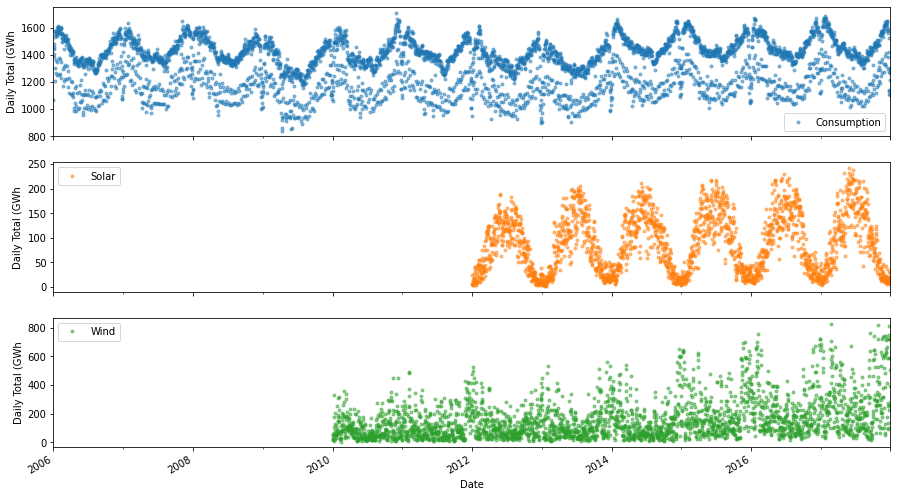

In [10]:
cols= ["Consumption", "Solar", "Wind"]

axes= opsd[cols].plot (marker=".", alpha=0.5, linestyle="None", figsize=(15,9), subplots= True)

for ax in axes:
  ax.set_ylabel("Daily Total (GWh");


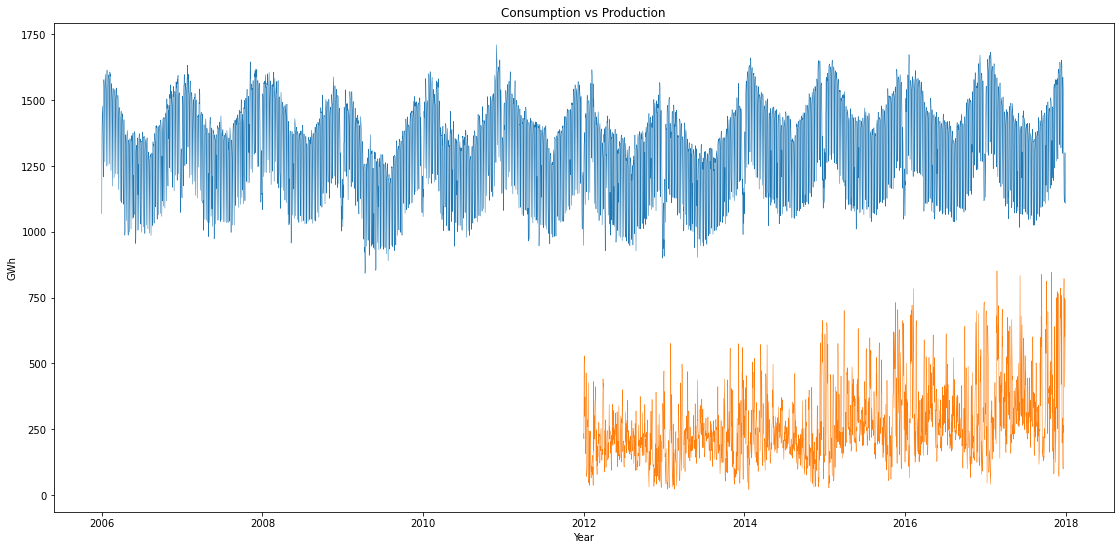

In [11]:
# Visualisation of consumption vs production 

plt.figure(figsize=(19,9))
plt.plot(opsd["Consumption"], linewidth= 0.5)
plt.plot(opsd["Wind+Solar"], linewidth=0.5)
plt.title("Consumption vs Production")

plt.xlabel("Year")
plt.ylabel("GWh")
plt.show()

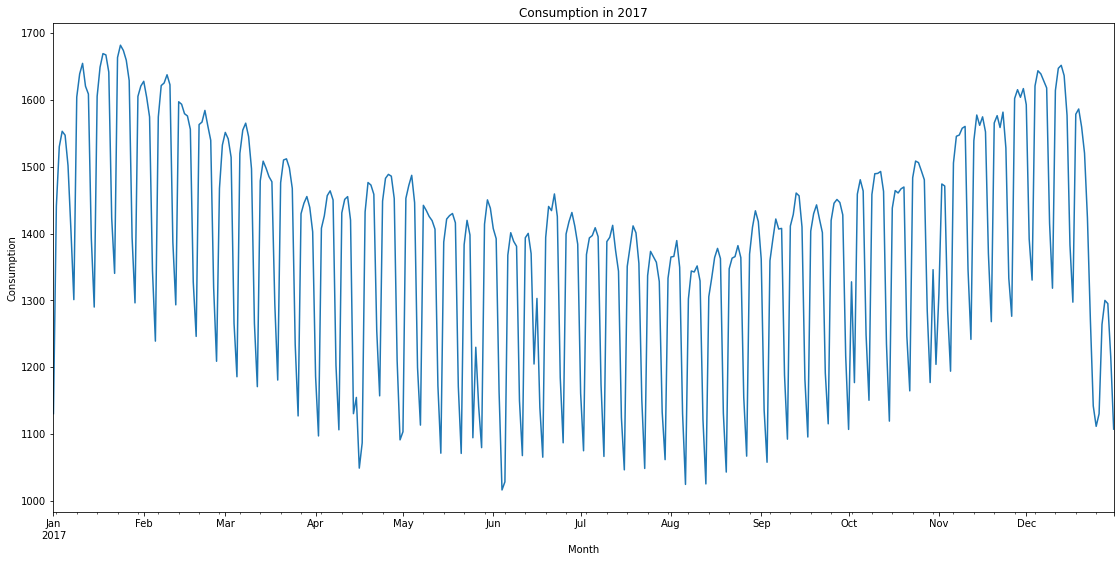

In [14]:
# using loc function we can slice data yearly,monthly, forthnightly, weekly, daily etc. 
# Let's analyse for yearly, monthly and  weekly 

plt.figure(figsize=(19,9))
ax= opsd.loc["2017": "2018", "Consumption"].plot()
ax.set_ylabel("Consumption")
ax.set_title("Consumption in 2017");
ax.set_xlabel("Month");

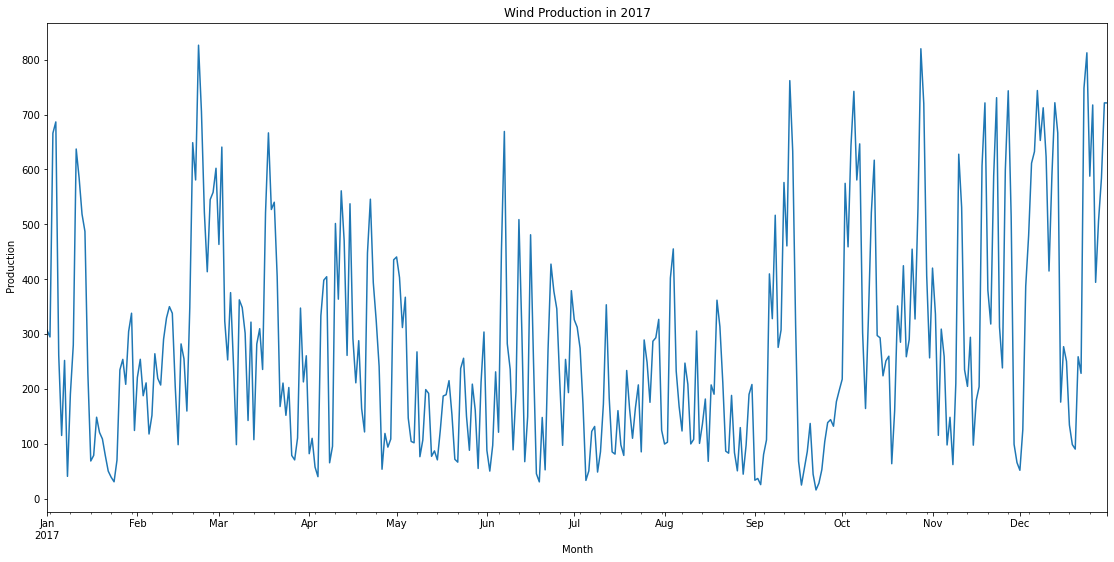

In [15]:
plt.figure(figsize=(19,9))
ax= opsd.loc["2017": "2018", "Wind"].plot()
ax.set_ylabel(" Production")
ax.set_title("Wind Production in 2017");
ax.set_xlabel("Month");


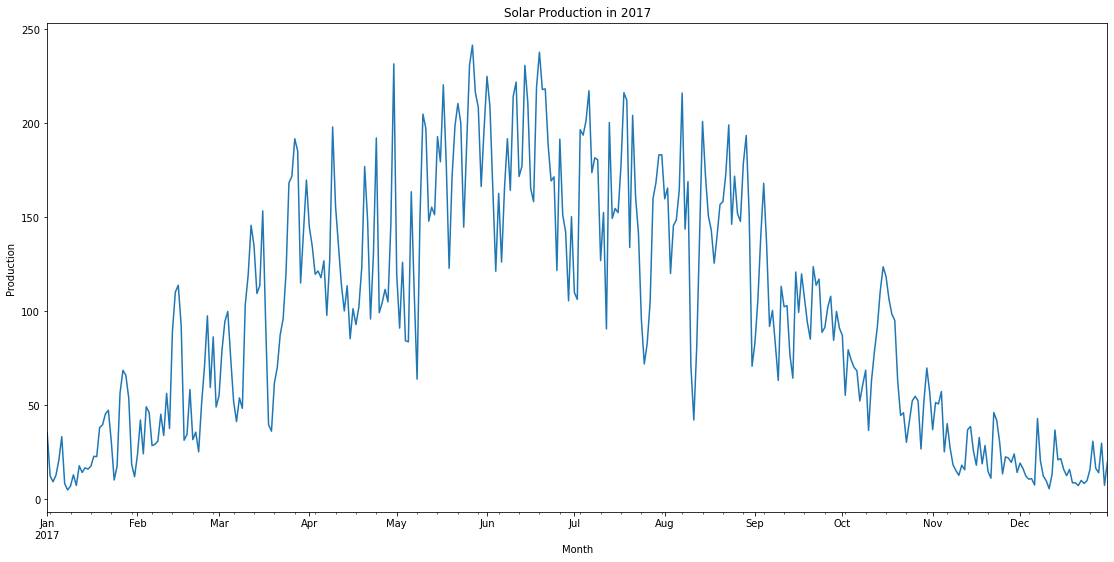

In [16]:
# Yearly Production of Solar  2017-01-01: 2017-12-01

plt.figure(figsize=(19,9))
ax= opsd.loc["2017": "2018", "Solar"].plot()
ax.set_ylabel("Production ")
ax.set_title("Solar Production in 2017");
ax.set_xlabel("Month");


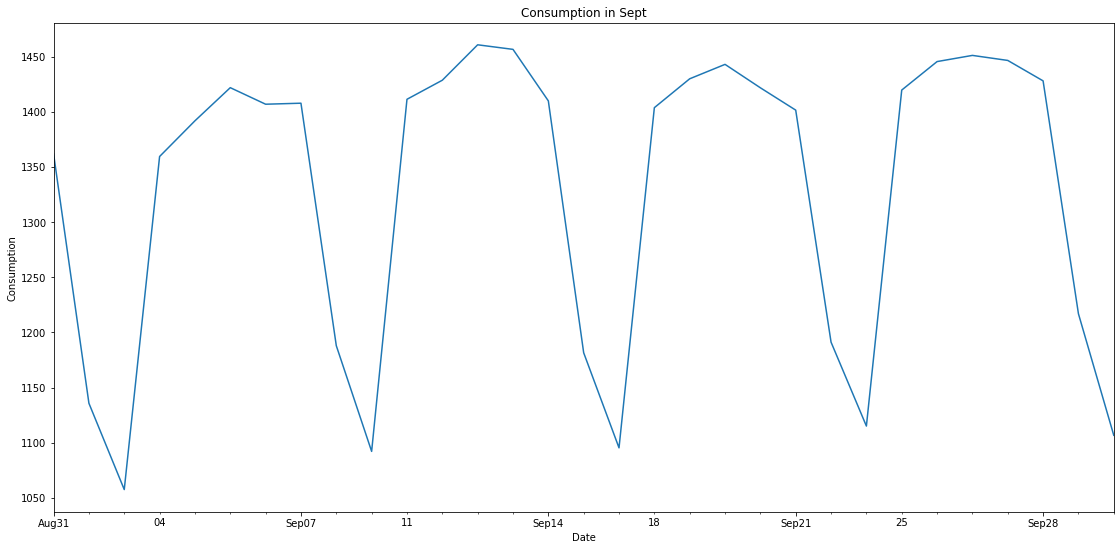

In [17]:
# Monthy Consumption 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-10-01", "Consumption"].plot()
ax.set_ylabel("Consumption")
ax.set_title("Consumption in Sept");
# Set x-axis major ticks to weekly interval 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b%d'));





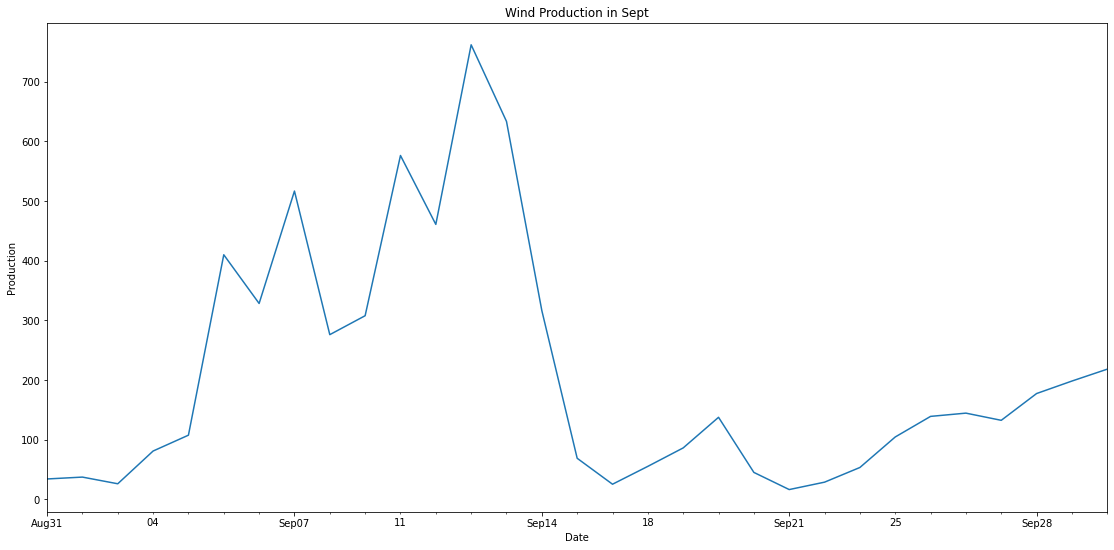

In [18]:
# Monthy Production 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-10-01", "Wind"].plot()
ax.set_ylabel("Production")
ax.set_title("Wind Production in Sept");
# Set x-axis major ticks to weekly interval 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b%d'));


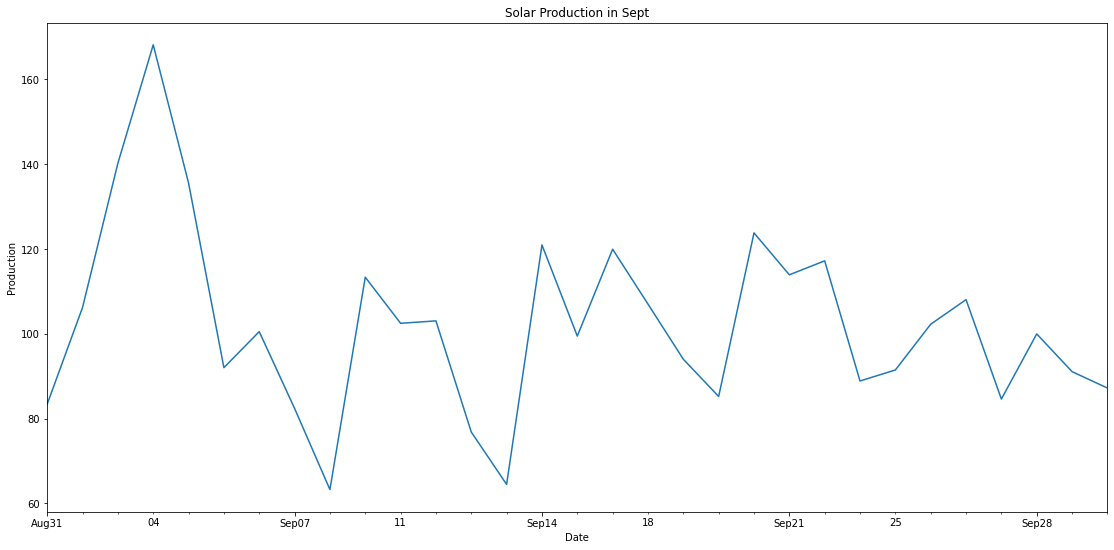

In [19]:
# Monthy Production 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-10-01", "Solar"].plot()
ax.set_ylabel("Production")
ax.set_title("Solar Production in Sept");
# Set x-axis major ticks to weekly interval 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b%d'));


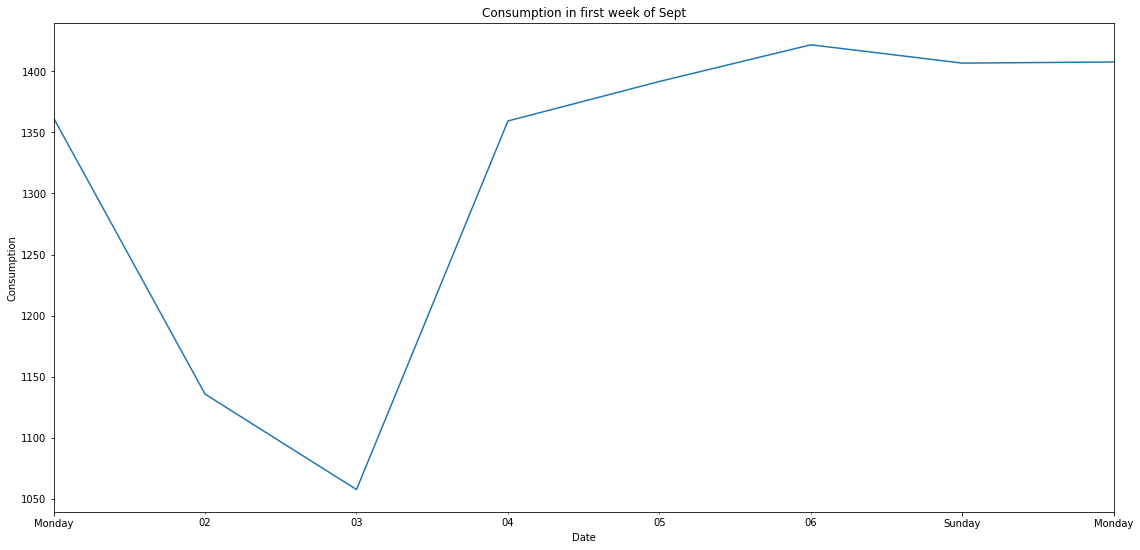

In [20]:
# Weekly Consumption 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-09-08", "Consumption"].plot()
ax.set_ylabel("Consumption")
ax.set_title("Consumption in first week of Sept");
# Set x-axis major ticks to weekly interval 
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO, SU)))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'));


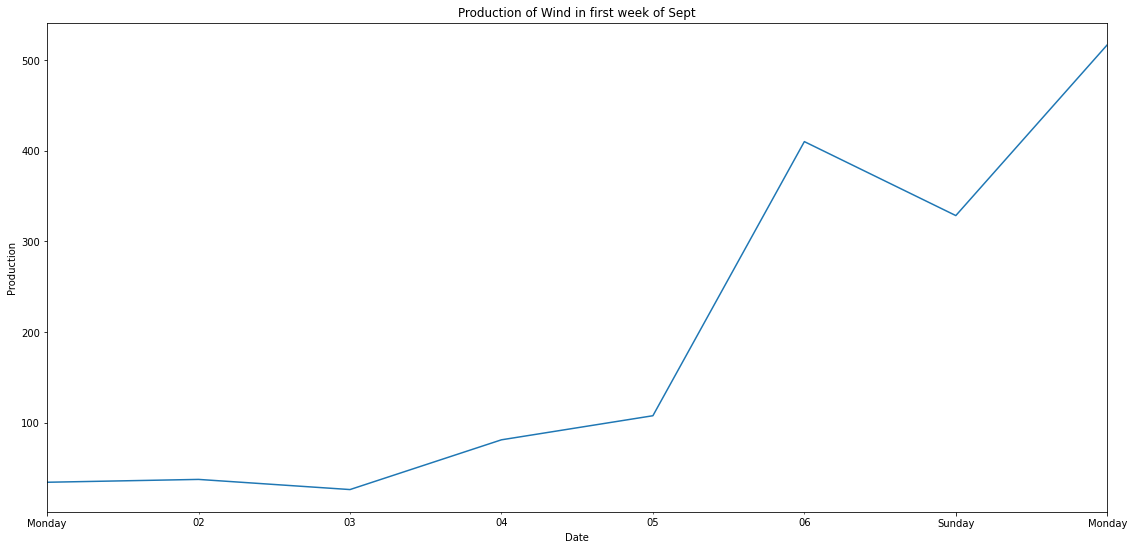

In [21]:
# Weekly Consumption 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-09-08", "Wind"].plot()
ax.set_ylabel("Production")
ax.set_title("Production of Wind in first week of Sept");
# Set x-axis major ticks to weekly interval 
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO, SU)))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'));


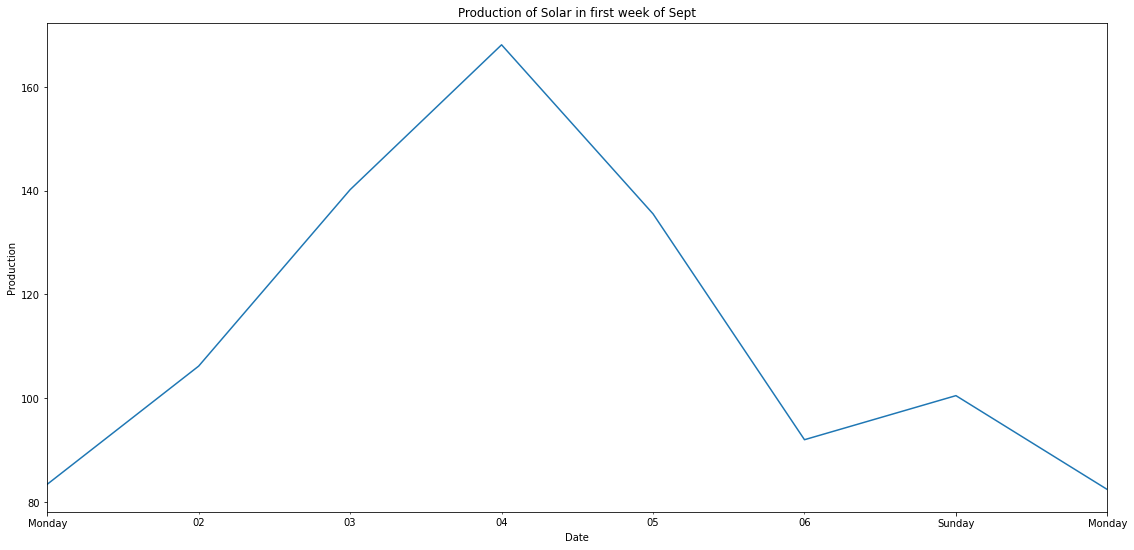

In [22]:
# Weekly Consumption 2017-09: 2017-10 
plt.figure(figsize=(19,9))
ax= opsd.loc["2017-09-01": "2017-09-08", "Solar"].plot()
ax.set_ylabel("Production")
ax.set_title("Production of Solar in first week of Sept");
# Set x-axis major ticks to weekly interval 
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO, SU)))
ax.set_xlabel("Date");
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'));


In [23]:
# Resampling
opsd_weekly_mean= opsd.resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [24]:
# Rolling Windows

# Rolling windows split data into time windows. 
# Rolling window assesses the stability of the model over time. 

#Compute for weekly 

opsd_weekly= opsd["Consumption"].rolling(7, center= True).mean()
opsd_weekly.head()


Date
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04    1361.471429
2006-01-05    1381.300143
Name: Consumption, dtype: float64

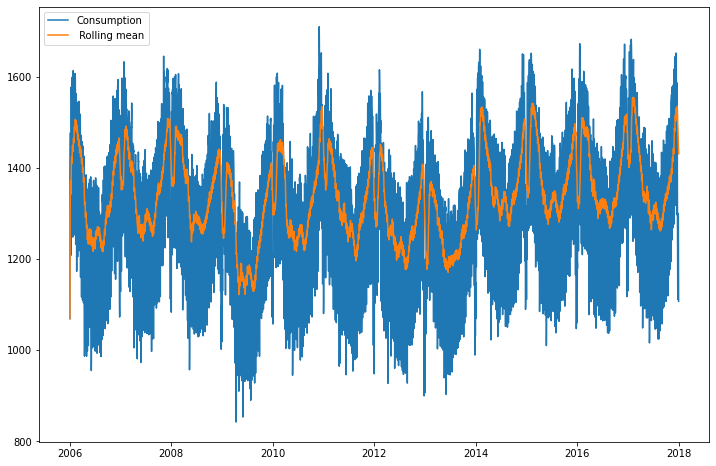

In [26]:

plt.figure (figsize= (12,8))

plt.plot(opsd["Consumption"], label= "Consumption")
plt.plot(opsd["Consumption"].rolling("30D").mean(), label= " Rolling mean")
plt.legend()
plt.show()